In [125]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
!pip install numpy
!pip install scikit-surprise

In [127]:
!conda install -c conda-forge scikit-surprise

/bin/bash: conda: command not found


In [147]:
import numpy as np
import pandas as pd
from surprise import SVD
from surprise import Dataset
from surprise import Reader
import pickle
from surprise import accuracy
from surprise import BaselineOnly
from surprise.model_selection import train_test_split

In [129]:
full_rating = pd.read_csv('/content/drive/My Drive/Data_Science/final_df.csv' )
del full_rating['Unnamed: 0']

In [130]:
dff = pd.read_csv('/content/drive/My Drive/Data_Science/Mapping_df.csv' )

In [131]:
full_rating.shape

(33669, 3)

In [132]:
len(full_rating.book_id.unique())

714

In [133]:
len(dff.title.unique())

714

In [134]:
dff.dtypes

Unnamed: 0      int64
article_id    float64
title          object
dtype: object

In [135]:
id_to_name = {}
list1 = list(dff['article_id'])
list2 = list(dff['title'])
for i in range(len(list1)-1):
    id_to_name[list1[i]] = list2[i] 

In [136]:
len(id_to_name)

713

In [137]:
full_rating

,user_id,book_id,rating
0,0000b6387a0366322d7fbfc6434af145adf7fed1,43.0,1
1,0000b6387a0366322d7fbfc6434af145adf7fed1,124.0,5
2,0000b6387a0366322d7fbfc6434af145adf7fed1,173.0,5
3,0000b6387a0366322d7fbfc6434af145adf7fed1,288.0,1
4,0000b6387a0366322d7fbfc6434af145adf7fed1,349.0,2
...,...,...,...
33664,fffb93a166547448a0ff0232558118d59395fecd,981.0,4
33665,fffb93a166547448a0ff0232558118d59395fecd,1304.0,2
33666,fffb93a166547448a0ff0232558118d59395fecd,1305.0,0
33667,fffb93a166547448a0ff0232558118d59395fecd,1430.0,3


In [138]:
full_rating.dtypes

user_id     object
book_id    float64
rating       int64
dtype: object

In [139]:
# Load our data into DataSet class of surprise package
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(full_rating[['user_id', 'book_id', 'rating']], reader)

In [140]:
# split into trainset and testset
trainset, testset = train_test_split(data, test_size=.10)
train_eval = trainset.build_testset()

In [141]:
# train a Funk SGD-SVD algorithms:
epochs = [1, 5, 10, 20, 40, 80, 100, 120, 150]
train_mse = []
test_mse = []
for n_epoch in epochs:
    print("Number of epochs trained", n_epoch)
    algo = SVD(n_factors = 40, lr_all = 0.001, n_epochs = n_epoch)
    algo.fit(trainset)
    train_predictions = algo.test(train_eval)
    test_predictions = algo.test(testset)
    train_mse.append(accuracy.mse(train_predictions))
    test_mse.append(accuracy.mse(test_predictions))
    print(accuracy.mse(train_predictions), accuracy.mse(test_predictions))

Number of epochs trained 1
MSE: 2.9191
MSE: 2.9841
MSE: 2.9191
MSE: 2.9841
2.919085723016623 2.9840625215180094
Number of epochs trained 5
MSE: 2.8696
MSE: 2.9880
MSE: 2.8696
MSE: 2.9880
2.8695632680116865 2.9879558922160734
Number of epochs trained 10
MSE: 2.8136
MSE: 3.0005
MSE: 2.8136
MSE: 3.0005
2.813573557599344 3.0004858122168194
Number of epochs trained 20
MSE: 2.7290
MSE: 3.0155
MSE: 2.7290
MSE: 3.0155
2.728986502241838 3.015496968354516
Number of epochs trained 40
MSE: 2.5427
MSE: 3.0592
MSE: 2.5427
MSE: 3.0592
2.542680228236667 3.0591632522129997
Number of epochs trained 80
MSE: 1.9667
MSE: 3.1275
MSE: 1.9667
MSE: 3.1275
1.9667190169424758 3.1274673531604193
Number of epochs trained 100
MSE: 1.5884
MSE: 3.1984
MSE: 1.5884
MSE: 3.1984
1.5883543659018298 3.198436068061023
Number of epochs trained 120
MSE: 1.2074
MSE: 3.2675
MSE: 1.2074
MSE: 3.2675
1.2073907259624204 3.267456240964681
Number of epochs trained 150
MSE: 0.8287
MSE: 3.3880
MSE: 0.8287
MSE: 3.3880
0.8286739036198774

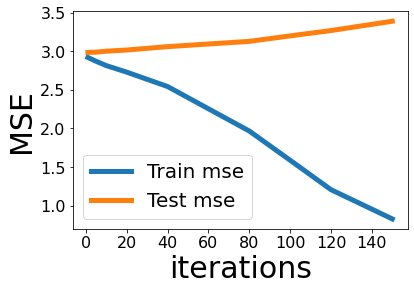

In [142]:
def plot_learning_curve(iter_array, train_accuracy, test_accuracy, xlabel = 'iterations'):
    plt.plot(iter_array, train_accuracy,
             label='Train mse', linewidth=5)
    plt.plot(iter_array, test_accuracy,
             label='Test mse', linewidth=5)


    plt.xticks(fontsize=16);
    plt.yticks(fontsize=16);
    plt.xlabel(xlabel, fontsize=30);
    plt.ylabel('MSE', fontsize=30);
    plt.legend(loc='best', fontsize=20);

plot_learning_curve(epochs, train_mse, test_mse)

In [143]:
#train on a full dataset and make prediction
full_trainset = data.build_full_trainset()
algo = SVD(n_factors = 40, lr_all = 0.001, verbose=True, n_epochs = 100)
algo.fit(full_trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

In [144]:
# make prediction:
all_book_id = full_rating.book_id.unique()
top_n = []
for book_id in all_book_id:
    top_n.append(algo.predict(uid = 124, iid = book_id))
    top_n.sort(key=lambda x: x.est, reverse=True)
print([id_to_name[pred.iid] for pred in top_n[:10]])

['why even a moth’s brain is smarter than an ai', 'time series analysis using max/min and neuroscience', 'making data cleaning simple with the sparkling.data library', 'this week in data science (february 28, 2017)', '9 mistakes to avoid when starting your career in data science', 'spark sql - rapid performance evolution', 'detect malfunctioning iot sensors with streaming analytics', 'data visualization with ggplot2 cheat sheet', 'airbnb data for analytics: washington d.c. listings', 'tidyr 0.6.0']


In [148]:
pickle.dump(algo, open("algo.pkl", "wb"))